## Упражнения по библиотеке Numpy

In [1]:
import numpy as np

In [48]:
import  scipy

In [57]:
import time

In [89]:
import os

In [96]:
import matplotlib.pyplot as plt

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [2]:
import random


array = [random.randint(0, 10) for _ in range(15)]
print("Исходный массив:", array)


for i in range(len(array)):
    if 3 < array[i] < 8:  
        array[i] = -array[i]

print("Измененный массив:", array)

Исходный массив: [1, 8, 8, 9, 7, 2, 4, 2, 10, 4, 9, 6, 9, 7, 3]
Измененный массив: [1, 8, 8, 9, -7, 2, -4, 2, 10, -4, 9, -6, 9, -7, 3]


**2.** Заменить максимальный элемент случайного массива на 0

In [3]:
array = [random.randint(1, 20) for _ in range(15)]
print("Исходный массив:", array)


max_value = max(array)


for i in range(len(array)):
    if array[i] == max_value:
        array[i] = 0

print("Массив после замены (всех максимумов):", array)

Исходный массив: [2, 14, 15, 6, 5, 8, 18, 18, 5, 8, 10, 9, 1, 10, 13]
Массив после замены (всех максимумов): [2, 14, 15, 6, 5, 8, 0, 0, 5, 8, 10, 9, 1, 10, 13]


**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [8]:


arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


result = np.array(np.meshgrid(*arr)).T.reshape(-1, arr.shape[0])

print("Исходный массив:")
print(arr)
print("\nПрямое произведение:")
print(result)
print(f"\nРазмер: {result.shape}")

Исходный массив:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Прямое произведение:
[[1 4 7]
 [1 5 7]
 [1 6 7]
 [2 4 7]
 [2 5 7]
 [2 6 7]
 [3 4 7]
 [3 5 7]
 [3 6 7]
 [1 4 8]
 [1 5 8]
 [1 6 8]
 [2 4 8]
 [2 5 8]
 [2 6 8]
 [3 4 8]
 [3 5 8]
 [3 6 8]
 [1 4 9]
 [1 5 9]
 [1 6 9]
 [2 4 9]
 [2 5 9]
 [2 6 9]
 [3 4 9]
 [3 5 9]
 [3 6 9]]

Размер: (27, 3)


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [17]:

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [2, 3, 1],
              [5, 6, 4],
              [8, 9, 7],
              [1, 4, 7],
              [2, 5, 8]])

B = np.array([[2, 3],
              [5, 6]])


def find_rows_fast(A, B):
    A_sets = [set(row) for row in A]
    B_sets = [set(row) for row in B]
    result = [any(b_set.issubset(a_set) for b_set in B_sets) 
              for a_set in A_sets]
    return np.array(result)

result_mask_6 = find_rows_fast(A, B) 
#print("Результат:", result_mask_6)

mask = find_rows_fast(A, B)


result_rows = A[mask]
print("Результат:", result_rows)

Результат: [[1 2 3]
 [4 5 6]
 [2 3 1]
 [5 6 4]]


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [19]:

matrix = np.array([[1,2,3],[4,4,4],[5,5,6],[7,8,9],[2,2,2],
                   [3,3,4],[1,1,1],[6,7,8],[9,9,9],[0,1,2]])


result = matrix[np.ptp(matrix, axis=1) != 0]
print(result)

[[1 2 3]
 [5 5 6]
 [7 8 9]
 [3 3 4]
 [6 7 8]
 [0 1 2]]


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [26]:

def unique_rows_float(arr, tolerance):
   
   
    arr_rounded = np.round(arr / tolerance) * tolerance
    
    return np.unique(arr_rounded, axis=0)

# Пример с числами с плавающей точкой
arr_float = np.array([
    [1.0, 2.0, 3.0],
    [1.000000001, 2.000000001, 3.000000001],  # почти дубликат
    [4.0, 5.0, 6.0],
    [1.0, 2.0, 3.0],  # точный дубликат
])

unique_float = unique_rows_float(arr_float, tolerance=1e-6)
print("\nМассив float без дубликатов (с учетом допуска):")
print(unique_float)


Массив float без дубликатов (с учетом допуска):
[[1. 2. 3.]
 [4. 5. 6.]]


______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [27]:
X = np.array([[1, 0, 1],
              [2, 0, 2],
              [3, 0, 3],
              [4, 4, 4]])

# Решение в одну строку
result = np.prod(np.diag(X)[np.diag(X) != 0])
print(f"Произведение ненулевых элементов на диагонали: {result}")  # 3

Произведение ненулевых элементов на диагонали: 3


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [30]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2]) 
same_multiset_one_line = lambda x, y: np.array_equal(np.sort(x), np.sort(y))
print(f"\nsame_multiset_one_line(x, y) = {same_multiset_one_line(x, y)}")


same_multiset_one_line(x, y) = True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [31]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

# Решение в одну строку
result = np.max(x[1:][x[:-1] == 0]) if np.any(x[:-1] == 0) else None

print(f"Максимальный элемент после нуля: {result}")  # 5

Максимальный элемент после нуля: 5


In [33]:
x[1:][x[:-1] == 0]

array([3, 0, 5])

In [34]:
[x[:-1] == 0]

[array([False, False,  True, False,  True,  True, False, False])]

array([0, 0, 0])

* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [46]:

def rle_oneline(x):
   
    return (lambda p: (x[p], np.diff(np.append(p, len(x)))))(np.where(np.diff(x, prepend=x[0]-1))[0]) if len(x) > 0 else (np.array([]), np.array([]))

x = np.array([2, 2, 2, 3, 3, 3, 5])
print(f"Одна строка: {rle_oneline(x)}")


Одна строка: (array([2, 3, 5]), array([3, 3, 1], dtype=int64))


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [67]:
from scipy.spatial.distance import cdist

def euclidean_dist_cdist(X, Y):

    return cdist(X, Y, metric='euclidean')

# Использование
X = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])


dist_matrix = euclidean_dist_cdist(X, Y)


print("Матрица расстояний:")
print(dist_matrix)

X = np.random.rand(500, 10)
Y = np.random.rand(300, 10)

start = time.time()
dist1 = my_cdist(X, Y)
t1 = time.time() - start

print(f"Время выполнения: {t1:.4f} сек")




Матрица расстояний:
[[5.65685425 8.48528137]
 [2.82842712 5.65685425]]
Время выполнения: 0.0070 сек


In [68]:
def my_cdist(X, Y):
    
    X_sq = np.sum(X**2, axis=1)[:, np.newaxis]
    Y_sq = np.sum(Y**2, axis=1)[np.newaxis, :]
    XY = X @ Y.T
     
    dist_sq = X_sq + Y_sq - 2 * XY
    dist_sq = np.maximum(dist_sq, 0)  # исправляем ошибки округления
    return np.sqrt(dist_sq)

X = np.random.rand(500, 10)
Y = np.random.rand(300, 10)

start = time.time()
dist1 = my_cdist(X, Y)
t1 = time.time() - start

print(f"Время выполнения: {t1:.4f} сек")



Время выполнения: 0.0070 сек


_______
________

Вывод: для небольших данных разница не существенна

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [77]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

C:\Users\darya\AppData\Local\Temp\ipykernel_21336\2349839781.py:1: UserWarning: loadtxt: Empty input file: "cereal(1).csv"
  calorie_stats = np.loadtxt(  "cereal(1).csv", delimiter=",", skiprows=1,


array([], dtype=float64)

In [93]:
calorie_stats = np.loadtxt(
   "cereal.csv",
    delimiter=","

)




46.883116883116884


In [91]:
print("exists:", os.path.exists("cereal.csv"))
print("size:", os.path.getsize("cereal.csv"))

exists: True
size: 372


2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [94]:
# Калорийность CrunchieMunchies
crunchie_calories = 60


average_competitor_calories = np.mean(calorie_stats)


average_calories = average_competitor_calories - crunchie_calories


print(average_calories)

46.883116883116884


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [95]:
calorie_stats_sorted = np.sort(calorie_stats)


print(calorie_stats_sorted)

[ 50.  50.  50.  70.  70.  80.  90.  90.  90.  90.  90.  90.  90. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 130.
 130. 140. 140. 140. 150. 150. 160.]


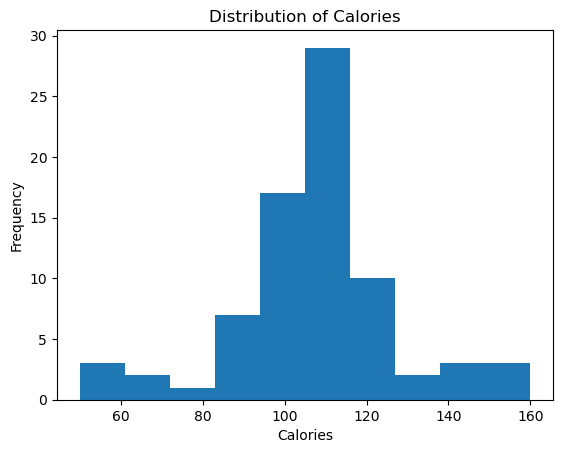

In [97]:
# Построение гистограммы распределения калорий
plt.figure()
plt.hist(calorie_stats, bins=10)
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Distribution of Calories")

# Показать график
plt.show()

4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [98]:
# Медиана набора данных
median_calories = np.median(calorie_stats)

# Среднее значение (для сравнения)
mean_calories = np.mean(calorie_stats)


print("Median calories:", median_calories)
print("Mean calories:", mean_calories)

Median calories: 110.0
Mean calories: 106.88311688311688


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [99]:
target = 60

for p in range(101):
    value = np.percentile(calorie_stats, p)
    if value > target:
        percentile_number = p
        nth_percentile = value
        break

print("Percentile number:", percentile_number)
print("Percentile value:", nth_percentile)

Percentile number: 4
Percentile value: 70.0


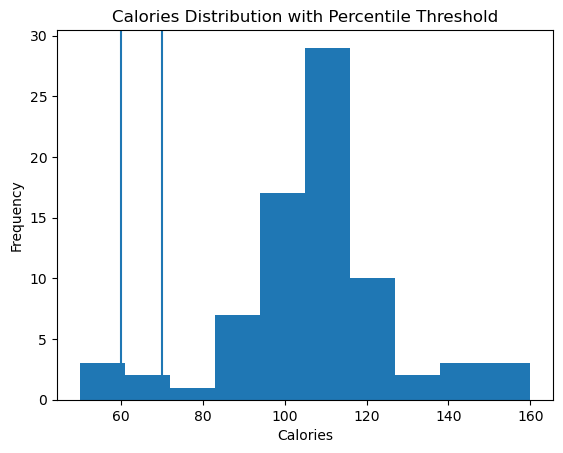

In [100]:
plt.figure()
plt.hist(calorie_stats, bins=10)
plt.axvline(60)
plt.axvline(nth_percentile)

plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Calories Distribution with Percentile Threshold")

plt.show()

6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [101]:

more_calories = np.sum(calorie_stats > 60) / len(calorie_stats) * 100


print(more_calories)

96.1038961038961


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [102]:

calorie_std = np.std(calorie_stats)


print(calorie_std)

19.35718533390827


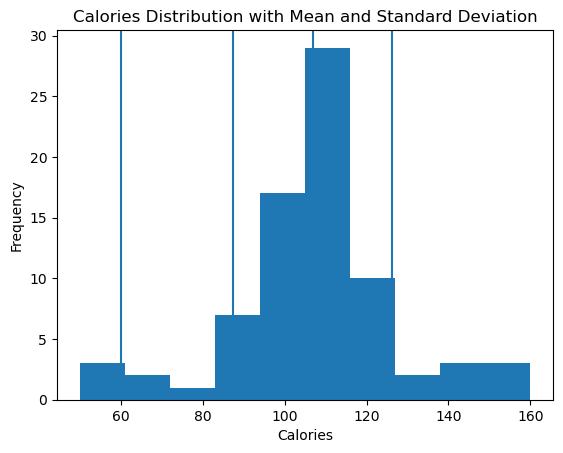

In [103]:
plt.figure()
plt.hist(calorie_stats, bins=10)

# Линии среднего и стандартного отклонения
plt.axvline(mean_calories)
plt.axvline(mean_calories + calorie_std)
plt.axvline(mean_calories - calorie_std)

# Линия для CrunchieMunchies (60 калорий)
plt.axvline(60)

plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Calories Distribution with Mean and Standard Deviation")

plt.show()

8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

На основе анализа данных видно, что средняя калорийность хлопьев на рынке превышает 60 калорий на порцию, а также что более половины продуктов содержат калорийность выше этого значения. Медиана и стандартное отклонение показывают, что распределение калорий достаточно широкое, то есть на рынке представлены как низкокалорийные, так и более калорийные варианты. На этом фоне CrunchieMunchies с 60 калориями выглядят более лёгким и сбалансированным продуктом. Эти данные Mycrunch может использовать в маркетинге, позиционируя CrunchieMunchies как более здоровую альтернативу большинству конкурентов, делая акцент на контроле калорийности и подходящем выборе для потребителей, следящих за питанием.